In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load dataset
df = pd.read_csv("distance_dataset.csv")
df.head()

,Unnamed: 0,X,Y,Z,ClusterID
0,0,5.135779,4.167542,5.787635,4
1,1,4.280721,5.770909,6.091044,4
2,2,8.329098,7.540436,3.247239,2
3,3,5.470224,5.069249,5.768313,4
4,4,2.381797,2.402374,3.879101,1


In [4]:
data = df[['X', 'Y', 'Z']].values

In [6]:
# Euclidean distances
euclidean_distances = distance.pdist(data, metric='euclidean')

# Manhattan distances
manhattan_distances = distance.pdist(data, metric='cityblock')

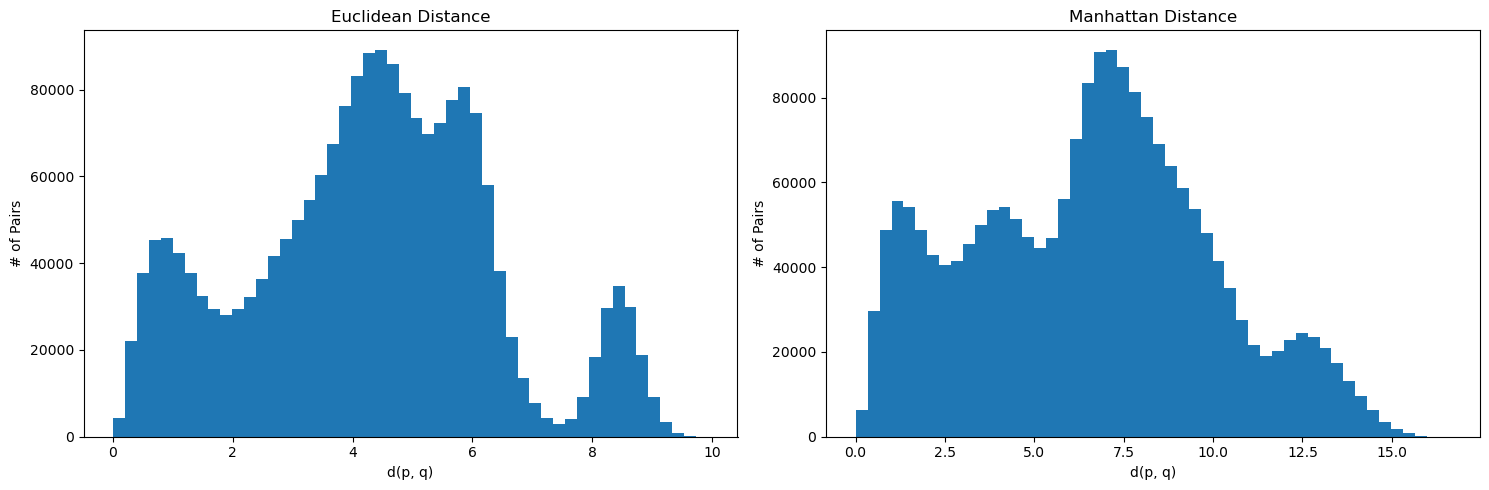

In [8]:
plt.figure(figsize=(15, 5))

# Euclidean Histogram
plt.subplot(1, 2, 1)
plt.hist(euclidean_distances, bins=50)
plt.title('Euclidean Distance')
plt.xlabel('d(p, q)')
plt.ylabel('# of Pairs')

# Manhattan Histogram
plt.subplot(1, 2, 2)
plt.hist(manhattan_distances, bins=50)
plt.title('Manhattan Distance')
plt.xlabel('d(p, q)')
plt.ylabel('# of Pairs')

plt.tight_layout()
plt.show()

In [10]:
reference_point = np.array([5, 5, 5])

# Euclidean distance from center
df['euclidean'] = np.linalg.norm(df[['X', 'Y', 'Z']].values - reference_point, axis=1)

# Manhattan distance from center
df['manhattan'] = np.abs(df[['X', 'Y', 'Z']].values - reference_point).sum(axis=1)

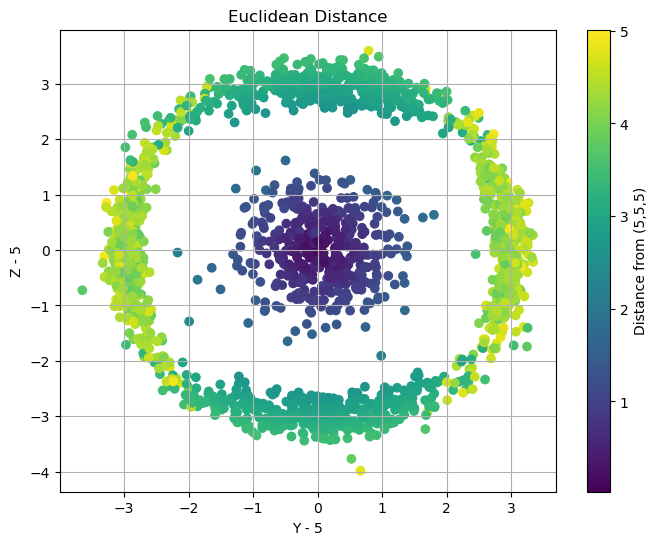

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Y'] - 5, df['Z'] - 5, c=df['euclidean'], cmap='viridis')
plt.colorbar(label='Distance from (5,5,5)')
plt.title('Euclidean Distance')
plt.xlabel('Y - 5')
plt.ylabel('Z - 5')
plt.grid(True)
plt.show()

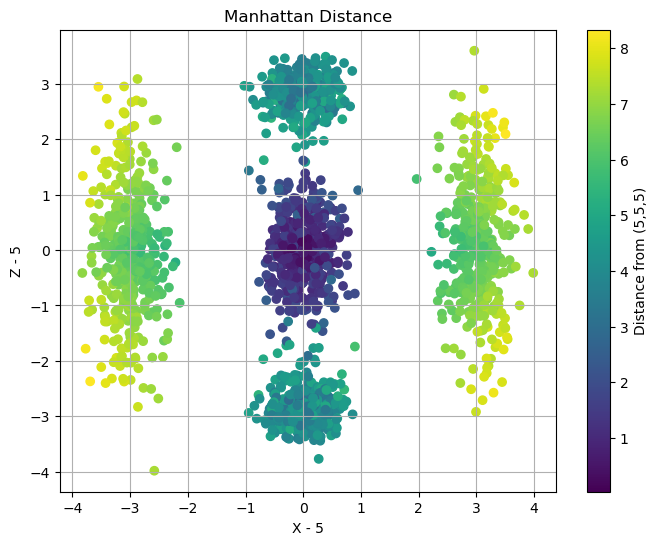

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(df['X'] - 5, df['Z'] - 5, c=df['manhattan'], cmap='viridis')
plt.colorbar(label='Distance from (5,5,5)')
plt.title('Manhattan Distance')
plt.xlabel('X - 5')
plt.ylabel('Z - 5')
plt.grid(True)
plt.show()